# Interactive Segmentation with SAM3 + GIS Vector Export

[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeos/segment-geospatial/blob/main/docs/examples/sam3_interactive.ipynb)

This notebook demonstrates how to segment remote sensing images interactively using the Segment Anything Model 3 (SAM3) and **export segmentation masks as GIS vector geometries** (GeoPackage, Shapefile, GeoJSON, etc.).

## Installation

First, make sure you have the required dependencies installed:

The following are notes that i learned through testing:

I had success with cook county orthographic images over park ridge with just a text prompt. The exports were a large 5000x5000 tile and by resizing them to 2048x2028 I had much better success that could potentially make this production ready. 

In [18]:
%pip install "segment-geospatial[samgeo3]"

  Using cached huggingface_hub-0.36.0-py3-none-any.whl.metadata (14 kB)
INFO: pip is looking at multiple versions of transformers to determine which version is compatible with other requirements. This could take a while.
  Using cached transformers-4.57.3-py3-none-any.whl.metadata (43 kB)
Using cached huggingface_hub-0.36.0-py3-none-any.whl (566 kB)
Using cached transformers-4.57.3-py3-none-any.whl (12.0 MB)
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface_hub 1.1.7
    Uninstalling huggingface_hub-1.1.7:
      Successfully uninstalled huggingface_hub-1.1.7
  Attempting uninstall: transformers
    Found existing installation: transformers 5.0.0.dev0
    Uninstalling transformers-5.0.0.dev0:
      Successfully uninstalled transformers-5.0.0.dev0
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
%pip install git+https://github.com/huggingface/transformers.git

## Import Libraries


In [1]:
import leafmap
import geopandas as gpd
from samgeo import SamGeo3, download_file
from samgeo.common import (
    raster_to_vector,
    raster_to_gpkg,
    raster_to_shp,
    raster_to_geojson
)

To use SamGeo 2, install it as:
	pip install segment-geospatial[samgeo2]


## Set the path to your image


In [13]:
image_path = r"C:\dev\sam3\sam3\examples\geoexamples\11509500_clip_2048.tif"
sam3.set_image(image_path)

In [14]:
m = leafmap.Map()
m.add_raster(str(image_path), layer_name="Satellite image")


## Request access to SAM3

To use SAM3, you need to request access by filling out this form on Hugging Face: https://huggingface.co/facebook/sam3

Once you have access, uncomment the following code block and run it.

In [ ]:
from huggingface_hub import login
login()

## Initialize SAM3

When initializing SAM3, you can choose the backend from "meta", or "transformers".

In [12]:
sam3 = SamGeo3(
    backend="meta", device=None, checkpoint_path=None, load_from_HF=True
)

Using cuda device and meta backend


## Set the image

You can set the image by either passing the image path or the image URL.

In [15]:
sam3.set_image(image_path)

## Generate masks with text prompt

In [ ]:
sam3.generate_masks(prompt="building")

## Save masks as raster (GeoTIFF)

In [ ]:
# Save the segmentation masks as a GeoTIFF
mask_raster = "masks.tif"
sam3.save_masks(mask_raster)

## Show the results

In [ ]:
m = sam3.show_map(
    height="700px",
    min_size=1   # allow very small objects to survive post-processing
)
m



Map(center=[42.022737, -87.8475325], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title…

In [ ]:
sam3.show_anns()

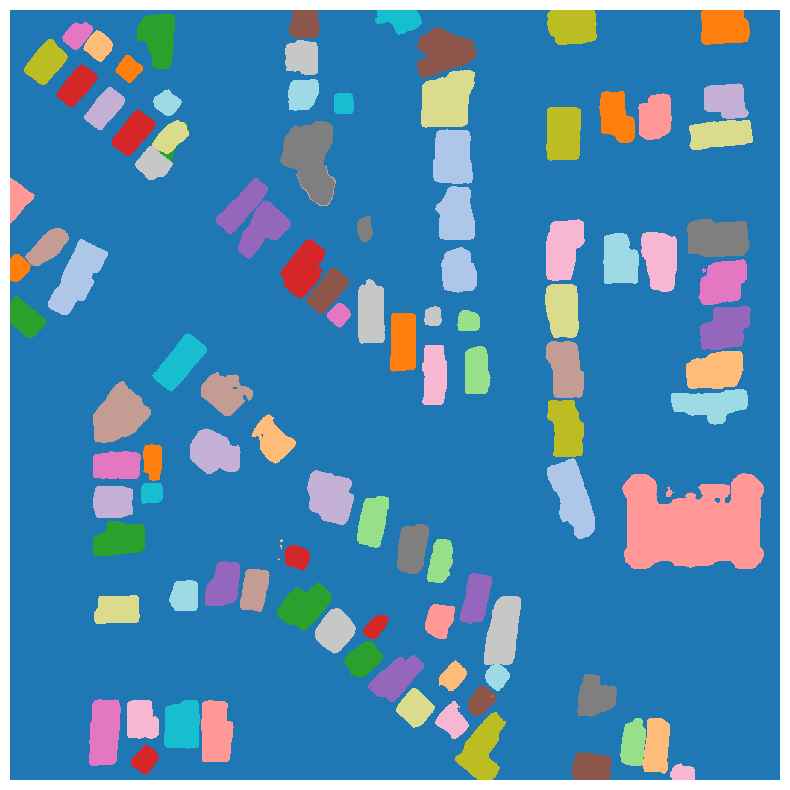

In [17]:
sam3.show_masks()

---
# GIS Vector Export Section

This section demonstrates how to export segmentation masks as GIS vector geometries in various formats.

## Export to GeoPackage (.gpkg)

GeoPackage is a modern, open standard format that's great for storing vector and raster data.

In [ ]:
# Export masks to GeoPackage
gpkg_output = "segmentation_masks.gpkg"
raster_to_gpkg(mask_raster, gpkg_output, simplify_tolerance=None)
print(f"Exported to: {gpkg_output}")

## Export to Shapefile (.shp)

Shapefile is a widely-supported legacy format compatible with ArcGIS, QGIS, and most GIS software.

In [ ]:
# Export masks to Shapefile
shp_output = "segmentation_masks.shp"
raster_to_shp(mask_raster, shp_output, simplify_tolerance=None)
print(f"Exported to: {shp_output}")

## Export to GeoJSON (.geojson)

GeoJSON is a lightweight, human-readable format ideal for web mapping applications.

In [ ]:
# Export masks to GeoJSON
geojson_output = "segmentation_masks.geojson"
raster_to_geojson(mask_raster, geojson_output, simplify_tolerance=None)
print(f"Exported to: {geojson_output}")

## Export to Any Vector Format (GeoPandas-supported)

The `raster_to_vector()` function can export to any format supported by GeoPandas/Fiona, including:
- GeoPackage (.gpkg)
- Shapefile (.shp)
- GeoJSON (.geojson)
- FlatGeobuf (.fgb)
- KML (.kml)
- And more...

In [ ]:
# Export to FlatGeobuf (a fast, streamable format)
fgb_output = "segmentation_masks.fgb"
raster_to_vector(mask_raster, fgb_output, simplify_tolerance=None)
print(f"Exported to: {fgb_output}")

## Export with Geometry Simplification

Use `simplify_tolerance` to reduce the number of vertices in the output geometries. Higher values = simpler geometries with fewer vertices.

In [ ]:
# Export with simplified geometries (tolerance in map units)
simplified_output = "segmentation_masks_simplified.gpkg"
raster_to_gpkg(mask_raster, simplified_output, simplify_tolerance=0.5)
print(f"Exported simplified geometries to: {simplified_output}")

## View and Analyze Exported Vector Data

Load the exported vector data with GeoPandas for further analysis.

In [ ]:
# Load the exported GeoPackage
gdf = gpd.read_file(gpkg_output)

# Display basic info
print(f"Number of features: {len(gdf)}")
print(f"CRS: {gdf.crs}")
print(f"Geometry types: {gdf.geometry.type.unique()}")
print(f"\nColumns: {gdf.columns.tolist()}")
print(f"\nFirst few rows:")
gdf.head()

## Calculate Geometry Statistics

Compute area, perimeter, and other geometric properties.

In [ ]:
# Calculate area and perimeter for each feature
gdf['area_sqm'] = gdf.geometry.area
gdf['perimeter_m'] = gdf.geometry.length
gdf['centroid_x'] = gdf.geometry.centroid.x
gdf['centroid_y'] = gdf.geometry.centroid.y

# Display statistics
print("Geometry Statistics:")
print(f"Total area: {gdf['area_sqm'].sum():.2f} sq units")
print(f"Average feature area: {gdf['area_sqm'].mean():.2f} sq units")
print(f"Min feature area: {gdf['area_sqm'].min():.2f} sq units")
print(f"Max feature area: {gdf['area_sqm'].max():.2f} sq units")

gdf[['value', 'area_sqm', 'perimeter_m', 'centroid_x', 'centroid_y']].head(10)

## Filter Features by Size

Remove small/noisy features based on area threshold.

In [ ]:
# Filter out small features (adjust threshold as needed)
min_area = 100  # minimum area in map units squared
gdf_filtered = gdf[gdf['area_sqm'] >= min_area].copy()

print(f"Original features: {len(gdf)}")
print(f"Features after filtering (area >= {min_area}): {len(gdf_filtered)}")

# Save filtered features
filtered_output = "segmentation_masks_filtered.gpkg"
gdf_filtered.to_file(filtered_output, driver="GPKG")
print(f"Saved filtered features to: {filtered_output}")

## Reproject to Different CRS

Reproject the vector data to a different coordinate reference system.

In [ ]:
# Reproject to WGS84 (EPSG:4326) for web mapping
gdf_wgs84 = gdf.to_crs("EPSG:4326")
print(f"Original CRS: {gdf.crs}")
print(f"New CRS: {gdf_wgs84.crs}")

# Save reprojected data
wgs84_output = "segmentation_masks_wgs84.geojson"
gdf_wgs84.to_file(wgs84_output, driver="GeoJSON")
print(f"Saved to: {wgs84_output}")

## Visualize Vector Data on Map

Display the exported vector geometries on an interactive map.

In [ ]:
# Create map with satellite image and vector overlay
m = leafmap.Map()
m.add_raster(image_path, layer_name="Satellite image")

# Style for vector overlay
style = {
    "color": "#3388ff",
    "weight": 2,
    "fillColor": "#7c4185",
    "fillOpacity": 0.5,
}

# Add vector layer
m.add_vector(gpkg_output, layer_name="Segmentation Masks", style=style)
m

## Export Function for Custom Workflows

Here's a reusable function that combines segmentation and vector export.

In [ ]:
def segment_and_export(
    sam_model,
    image_path: str,
    prompt: str,
    output_prefix: str = "segmentation",
    output_formats: list = ["gpkg", "shp", "geojson"],
    simplify_tolerance: float = None,
    min_area: float = None,
    target_crs: str = None,
):
    """
    Perform SAM3 segmentation and export results as GIS vector geometries.
    
    Parameters:
    -----------
    sam_model : SamGeo3
        Initialized SamGeo3 model
    image_path : str
        Path to the input image
    prompt : str
        Text prompt for segmentation (e.g., "building", "road", "tree")
    output_prefix : str
        Prefix for output files
    output_formats : list
        List of output formats: 'gpkg', 'shp', 'geojson', 'fgb'
    simplify_tolerance : float
        Tolerance for geometry simplification (None = no simplification)
    min_area : float
        Minimum area threshold to filter small features (None = no filtering)
    target_crs : str
        Target CRS for reprojection (None = keep original)
    
    Returns:
    --------
    dict : Dictionary with output file paths and GeoDataFrame
    """
    import os
    
    # Set image and generate masks
    sam_model.set_image(image_path)
    sam_model.generate_masks(prompt=prompt)
    
    # Save raster mask
    mask_raster = f"{output_prefix}_mask.tif"
    sam_model.save_masks(mask_raster)
    
    # Export to primary format (GeoPackage)
    primary_output = f"{output_prefix}.gpkg"
    raster_to_gpkg(mask_raster, primary_output, simplify_tolerance=simplify_tolerance)
    
    # Load and optionally process
    gdf = gpd.read_file(primary_output)
    
    # Filter by area if specified
    if min_area is not None:
        gdf['area'] = gdf.geometry.area
        gdf = gdf[gdf['area'] >= min_area].copy()
        gdf = gdf.drop(columns=['area'])
    
    # Reproject if specified
    if target_crs is not None:
        gdf = gdf.to_crs(target_crs)
    
    # Export to requested formats
    output_files = {}
    format_drivers = {
        'gpkg': 'GPKG',
        'shp': 'ESRI Shapefile',
        'geojson': 'GeoJSON',
        'fgb': 'FlatGeobuf',
    }
    
    for fmt in output_formats:
        if fmt in format_drivers:
            output_path = f"{output_prefix}.{fmt}"
            gdf.to_file(output_path, driver=format_drivers[fmt])
            output_files[fmt] = output_path
            print(f"Exported: {output_path}")
    
    return {
        'raster_mask': mask_raster,
        'vector_files': output_files,
        'geodataframe': gdf,
        'feature_count': len(gdf),
    }

In [ ]:
# Example usage of the export function
results = segment_and_export(
    sam_model=sam3,
    image_path=image_path,
    prompt="building",
    output_prefix="buildings",
    output_formats=["gpkg", "geojson"],
    simplify_tolerance=0.5,
    min_area=50,
    target_crs="EPSG:4326"
)

print(f"\nTotal features: {results['feature_count']}")
print(f"Output files: {results['vector_files']}")

## Interactive segmentation

Enter a text prompt or draw a rectangle on the map, then click on the **Segment** button to perform instance segmentation.

In [ ]:
sam3.show_map(height="700px", min_size=10)

Segmentation by text prompts.

![image](https://github.com/user-attachments/assets/535d69b5-8e0f-46a3-8f8b-9fc602628a7f)

Segmentation by bounding boxes.

![](https://github.com/user-attachments/assets/3d6a5aed-8f3f-4350-ba26-04a84328c50d)

## After Interactive Segmentation - Export Results

After using the interactive map to generate segmentation masks, export the results to vector formats.

In [ ]:
# Save the interactive segmentation masks
interactive_mask = "interactive_masks.tif"
sam3.save_masks(interactive_mask)

# Export to vector formats
raster_to_gpkg(interactive_mask, "interactive_masks.gpkg")
raster_to_geojson(interactive_mask, "interactive_masks.geojson")

print("Interactive segmentation results exported!")

---
## Summary of Export Options

| Format | Function | Extension | Use Case |
|--------|----------|-----------|----------|
| GeoPackage | `raster_to_gpkg()` | .gpkg | Modern, recommended for most GIS workflows |
| Shapefile | `raster_to_shp()` | .shp | Legacy format, wide compatibility |
| GeoJSON | `raster_to_geojson()` | .geojson | Web mapping, human-readable |
| Any format | `raster_to_vector()` | varies | FlatGeobuf, KML, etc. |

### Key Parameters:
- `simplify_tolerance`: Higher values = simpler geometries with fewer vertices
- Use GeoPandas for additional processing (filtering, reprojection, attribute calculation)